In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset/medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.shape

(986, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
df['PremiumPrice'].describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

<AxesSubplot:>

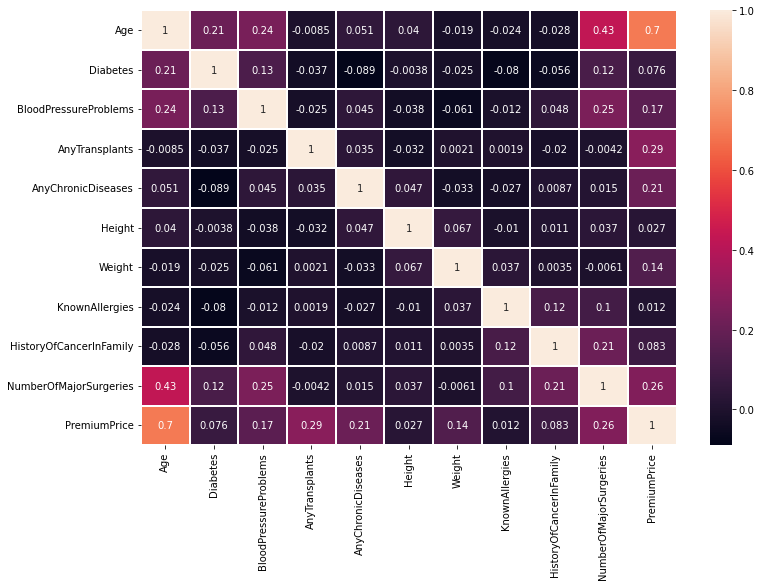

In [7]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True,linewidths=0.1)

In [8]:
for i in df.columns:
    print(i, len(df[i].unique()))

Age 49
Diabetes 2
BloodPressureProblems 2
AnyTransplants 2
AnyChronicDiseases 2
Height 44
Weight 74
KnownAllergies 2
HistoryOfCancerInFamily 2
NumberOfMajorSurgeries 4
PremiumPrice 24


In [9]:
binary_feature = [i for i in df.columns if (len(df[i].unique()) == 2)]
target_feature = 'PremiumPrice'
disceate_feature = [i for i in df.columns if (i not in binary_feature) and (i not in target_feature)]

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

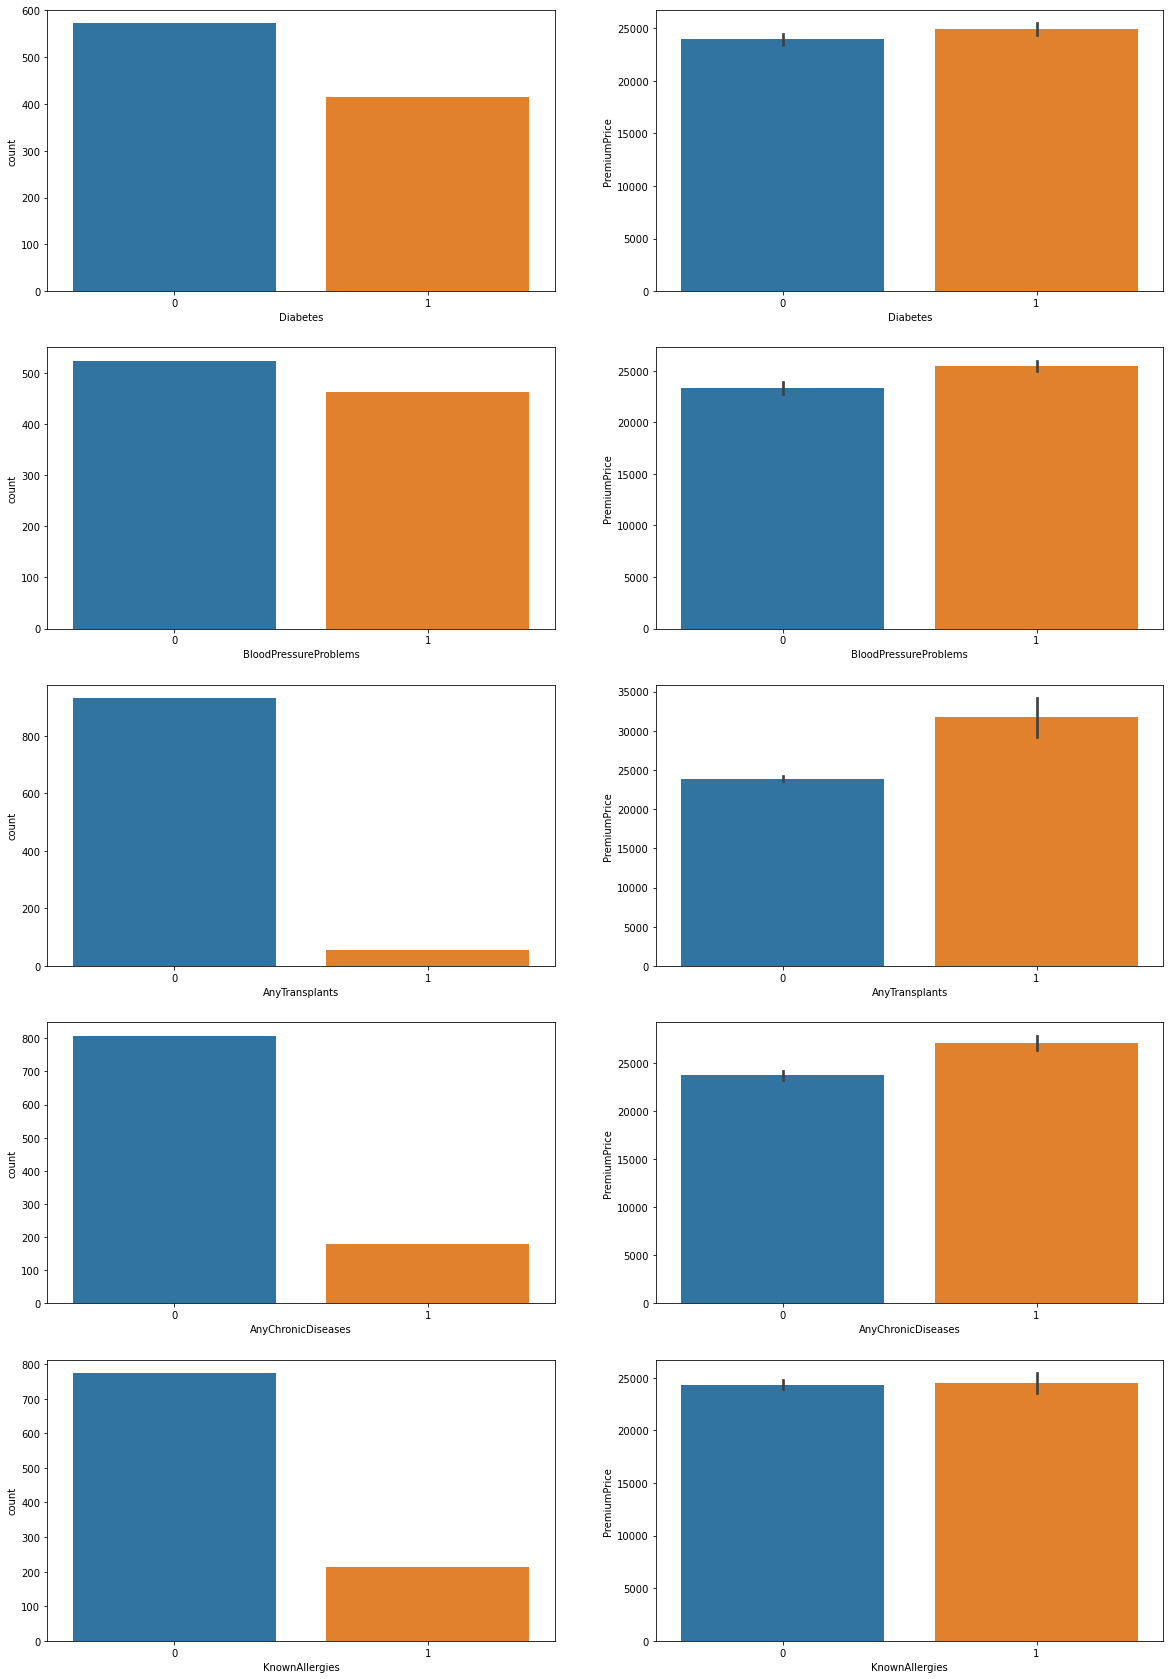

In [10]:
fig, ax = plt.subplots(5,2, figsize = (20,30))
sns.countplot(ax =ax[0,0], data = df , x = binary_feature[0])
sns.barplot(ax =ax[0,1], data = df , x = binary_feature[0], y = target_feature)
sns.countplot(ax =ax[1,0], data = df , x = binary_feature[1])
sns.barplot(ax =ax[1,1], data = df , x = binary_feature[1], y = target_feature)
sns.countplot(ax =ax[2,0], data = df , x = binary_feature[2])
sns.barplot(ax =ax[2,1], data = df , x = binary_feature[2], y = target_feature)
sns.countplot(ax =ax[3,0], data = df , x = binary_feature[3])
sns.barplot(ax =ax[3,1], data = df , x = binary_feature[3], y = target_feature)
sns.countplot(ax =ax[4,0], data = df , x = binary_feature[4])
sns.barplot(ax =ax[4,1], data = df , x = binary_feature[4], y = target_feature)

In [11]:
disceate_feature

['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

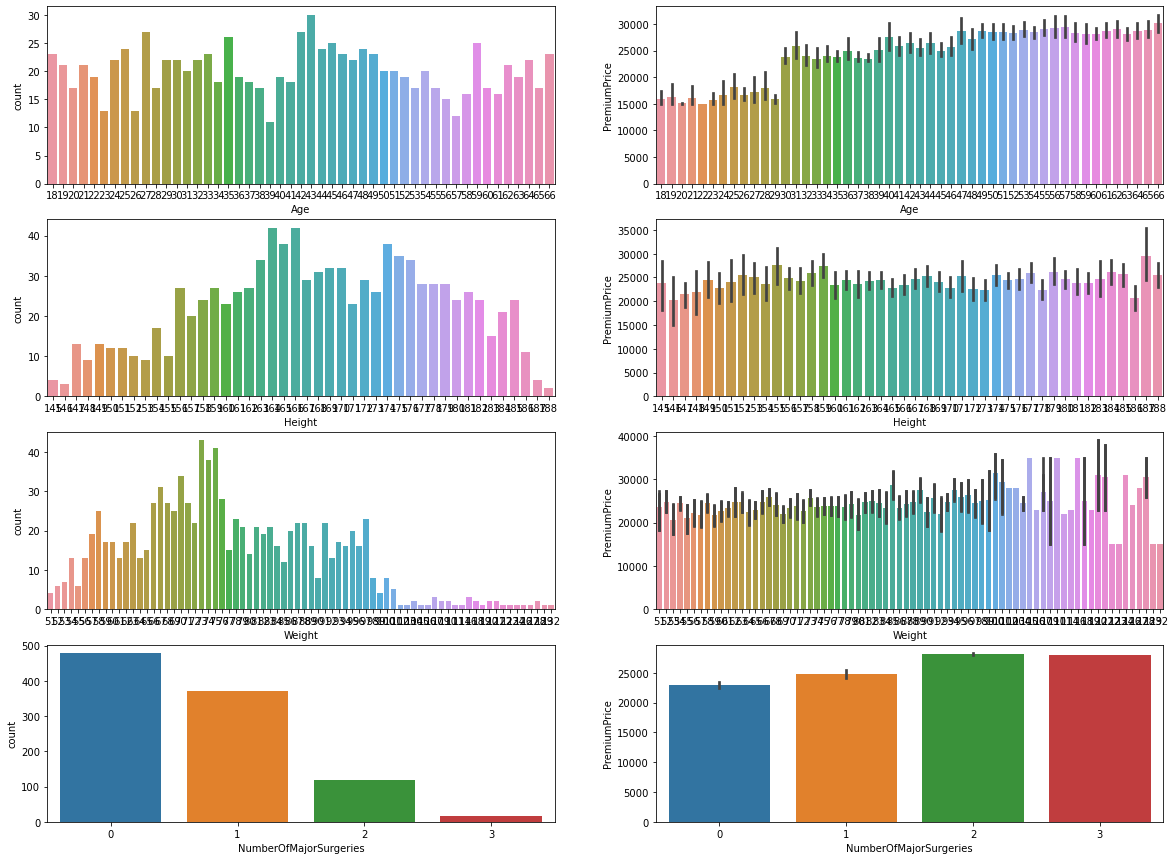

In [12]:
fig, ax = plt.subplots(4,2, figsize = (20,15))
sns.countplot(ax =ax[0,0], data = df , x = disceate_feature[0])
sns.barplot(ax =ax[0,1], data = df , x = disceate_feature[0], y = target_feature)
sns.countplot(ax =ax[1,0], data = df , x = disceate_feature[1])
sns.barplot(ax =ax[1,1], data = df , x = disceate_feature[1], y = target_feature)
sns.countplot(ax =ax[2,0], data = df , x = disceate_feature[2])
sns.barplot(ax =ax[2,1], data = df , x = disceate_feature[2], y = target_feature)
sns.countplot(ax =ax[2,0], data = df , x = disceate_feature[2])
sns.barplot(ax =ax[2,1], data = df , x = disceate_feature[2], y = target_feature)
sns.countplot(ax =ax[3,0], data = df , x = disceate_feature[3])
sns.barplot(ax =ax[3,1], data = df , x = disceate_feature[3], y = target_feature)

In [13]:
x = df.drop('PremiumPrice', axis =1)
y =df.PremiumPrice

In [14]:
#Scaling features between -1 and 1
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Model:  Linear Regression
Validation Accuracy:  0.6956006757585851
Training Accuracy:  0.6275442029676768
MAE: 2633.023085752831
MSE: 12202869.18583791
RMSE: 3493.260537926982


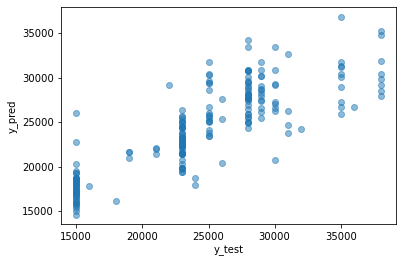

Model:  Lasso
Validation Accuracy:  0.6955398816442546
Training Accuracy:  0.6275438702739802
MAE: 2633.2359471259633
MSE: 12205306.322077593
RMSE: 3493.609354532586


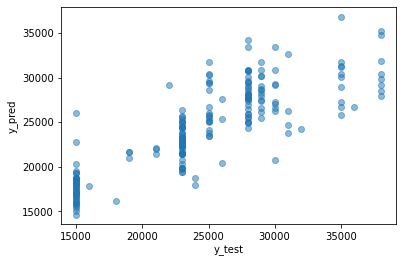

Model:  Ridge
Validation Accuracy:  0.6954815938777548
Training Accuracy:  0.627542693946961
MAE: 2633.7665715275552
MSE: 12207642.982947344
RMSE: 3493.9437578397487


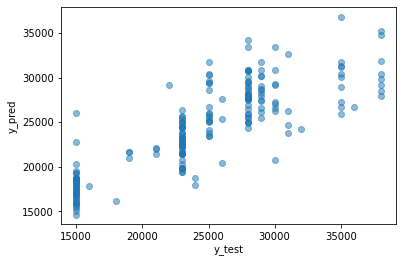

Model:  Random Forest Regressor
Validation Accuracy:  0.8870566084508763
Training Accuracy:  0.9665488577541136
MAE: 963.3333333333334
MSE: 4527715.151515151
RMSE: 2127.842839947338


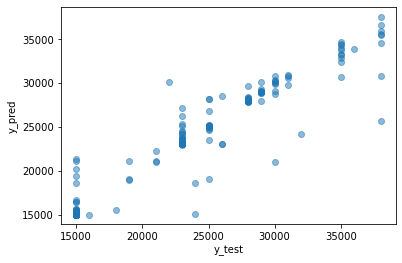

In [16]:
# Models to be used for ML
models = [('Linear Regression', LinearRegression()),
          ('Lasso', Lasso()),
          ('Ridge', Ridge()),
          ('Random Forest Regressor', RandomForestRegressor()),]

models_score = []
for name, model in models:
    model = model
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
#     models_score.append([name, accuracy_score(y_test, model.predict(x_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', model.score(x_test,y_test))
    print('Training Accuracy: ', model.score(x_train,y_train))
    
#     plt.figure()
#     cf_matrix = confusion_matrix(y_test, model.predict(x_test))
#     plt.title('Confusion Matrix: {}'.format(name))
#     sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
#     plt.show()

    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    plt.scatter(y_test, y_pred, alpha = 0.5)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

    

In [17]:
rf = RandomForestRegressor()

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [18]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [19]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

Random Forest Regressor with hyperparameter tuning: 
Validation Accuracy: 95.72 %.
Training Accuracy: 96.21 %.
MAE: 1050.7431903544693
MSE: 4860334.971475836
RMSE: 2204.616740269346


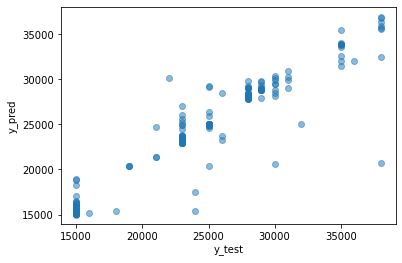

In [38]:
y_pred1 = rf_random.predict(x_test)
y_pred2 = rf_random.predict(x_train)
print("Random Forest Regressor with hyperparameter tuning: ")

errors = abs(y_pred1 - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Validation Accuracy:', round(accuracy, 2), '%.')

errors = abs(y_pred2 - y_train)
mape = 100 * (errors / y_train)
accuracy = 100 - np.mean(mape)
print('Training Accuracy:', round(accuracy, 2), '%.')

print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

plt.scatter(y_test, y_pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()